In [ ]:
#Import all the required libararies that will use in the code
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Reading and loading Dataset

There are three type of images like Letter card,grey blue and grey orange. I took ten different participate csv files and work on it, because if I work on the whole data set then it will be diffcult for me to process the data and also waiting time will be so much. 

In [ ]:
# We preprocess alittle bit the data and divide the dataset into 3 Categories Control, Testing and complete DATASET
# So we are performing all the analysis on all the three categories one by one and compare their MSE 

df = pd.read_csv('Testing_Group_data.csv')
df_sorted = df.sort_values(by="Participant_Number")


In [ ]:
#Printing the information of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Recording timestamp                  142 non-null    float64
 1   Gaze point X                         142 non-null    float64
 2   Gaze point Y                         142 non-null    float64
 3   Gaze point left X                    142 non-null    float64
 4   Gaze point left Y                    142 non-null    float64
 5   Gaze point right X                   142 non-null    float64
 6   Gaze point right Y                   142 non-null    float64
 7   Gaze direction left X                142 non-null    float64
 8   Gaze direction left Y                142 non-null    float64
 9   Gaze direction left Z                142 non-null    float64
 10  Gaze direction right X               142 non-null    float64
 11  Gaze direction right Y          

In [ ]:
#Print the total number of sum of null values in each columns 
null_counts = df.isnull().sum()
print(null_counts)

Recording timestamp                    0
Gaze point X                           0
Gaze point Y                           0
Gaze point left X                      0
Gaze point left Y                      0
Gaze point right X                     0
Gaze point right Y                     0
Gaze direction left X                  0
Gaze direction left Y                  0
Gaze direction left Z                  0
Gaze direction right X                 0
Gaze direction right Y                 0
Gaze direction right Z                 0
Pupil diameter left                    0
Pupil diameter right                   0
Eye position left X (DACSmm)           0
Eye position left Y (DACSmm)           0
Eye position left Z (DACSmm)           0
Eye position right X (DACSmm)          0
Eye position right Y (DACSmm)          0
Eye position right Z (DACSmm)          0
Gaze point left X (DACSmm)             0
Gaze point left Y (DACSmm)             0
Gaze point right X (DACSmm)            0
Gaze point right

# Preprocessing the Input Features of Dataset

In [ ]:
#In this code section, we are finding the variance between the columns of dataframe
variances = df.var()
low_variance_cols = variances[variances < 0.01].index
print(low_variance_cols)

Index(['Gaze direction left Z', 'Gaze direction right Z'], dtype='object')


In [ ]:
#finding the correlation matrix between the columns of the data frame 
correlationss = df.corr()
# in the code section, I find out the pair of columns of data frame which have correlation greater then 0.5
corr_pairs = []
for i in range(len(correlationss.columns)):
    for j in range(i):
        if abs(correlationss.iloc[i, j]) > 0.5:
            corr_pairs.append((correlationss.columns[i], correlationss.columns[j]))
print(corr_pairs)

[('Gaze point left X', 'Gaze point X'), ('Gaze point left Y', 'Gaze point Y'), ('Gaze point right Y', 'Gaze point Y'), ('Gaze point right Y', 'Gaze point left Y'), ('Gaze direction left X', 'Gaze point left X'), ('Gaze direction right Y', 'Gaze direction left Y'), ('Pupil diameter right', 'Pupil diameter left'), ('Eye position left Y (DACSmm)', 'Gaze direction right Y'), ('Eye position left Y (DACSmm)', 'Pupil diameter left'), ('Eye position right X (DACSmm)', 'Eye position left X (DACSmm)'), ('Eye position right Y (DACSmm)', 'Gaze direction right Y'), ('Eye position right Y (DACSmm)', 'Pupil diameter left'), ('Eye position right Y (DACSmm)', 'Eye position left Y (DACSmm)'), ('Eye position right Z (DACSmm)', 'Eye position left Z (DACSmm)'), ('Gaze point left X (DACSmm)', 'Gaze point left X'), ('Gaze point left X (DACSmm)', 'Gaze direction left X'), ('Gaze point left Y (DACSmm)', 'Gaze point Y'), ('Gaze point left Y (DACSmm)', 'Gaze point left Y'), ('Gaze point left Y (DACSmm)', 'Gaze p

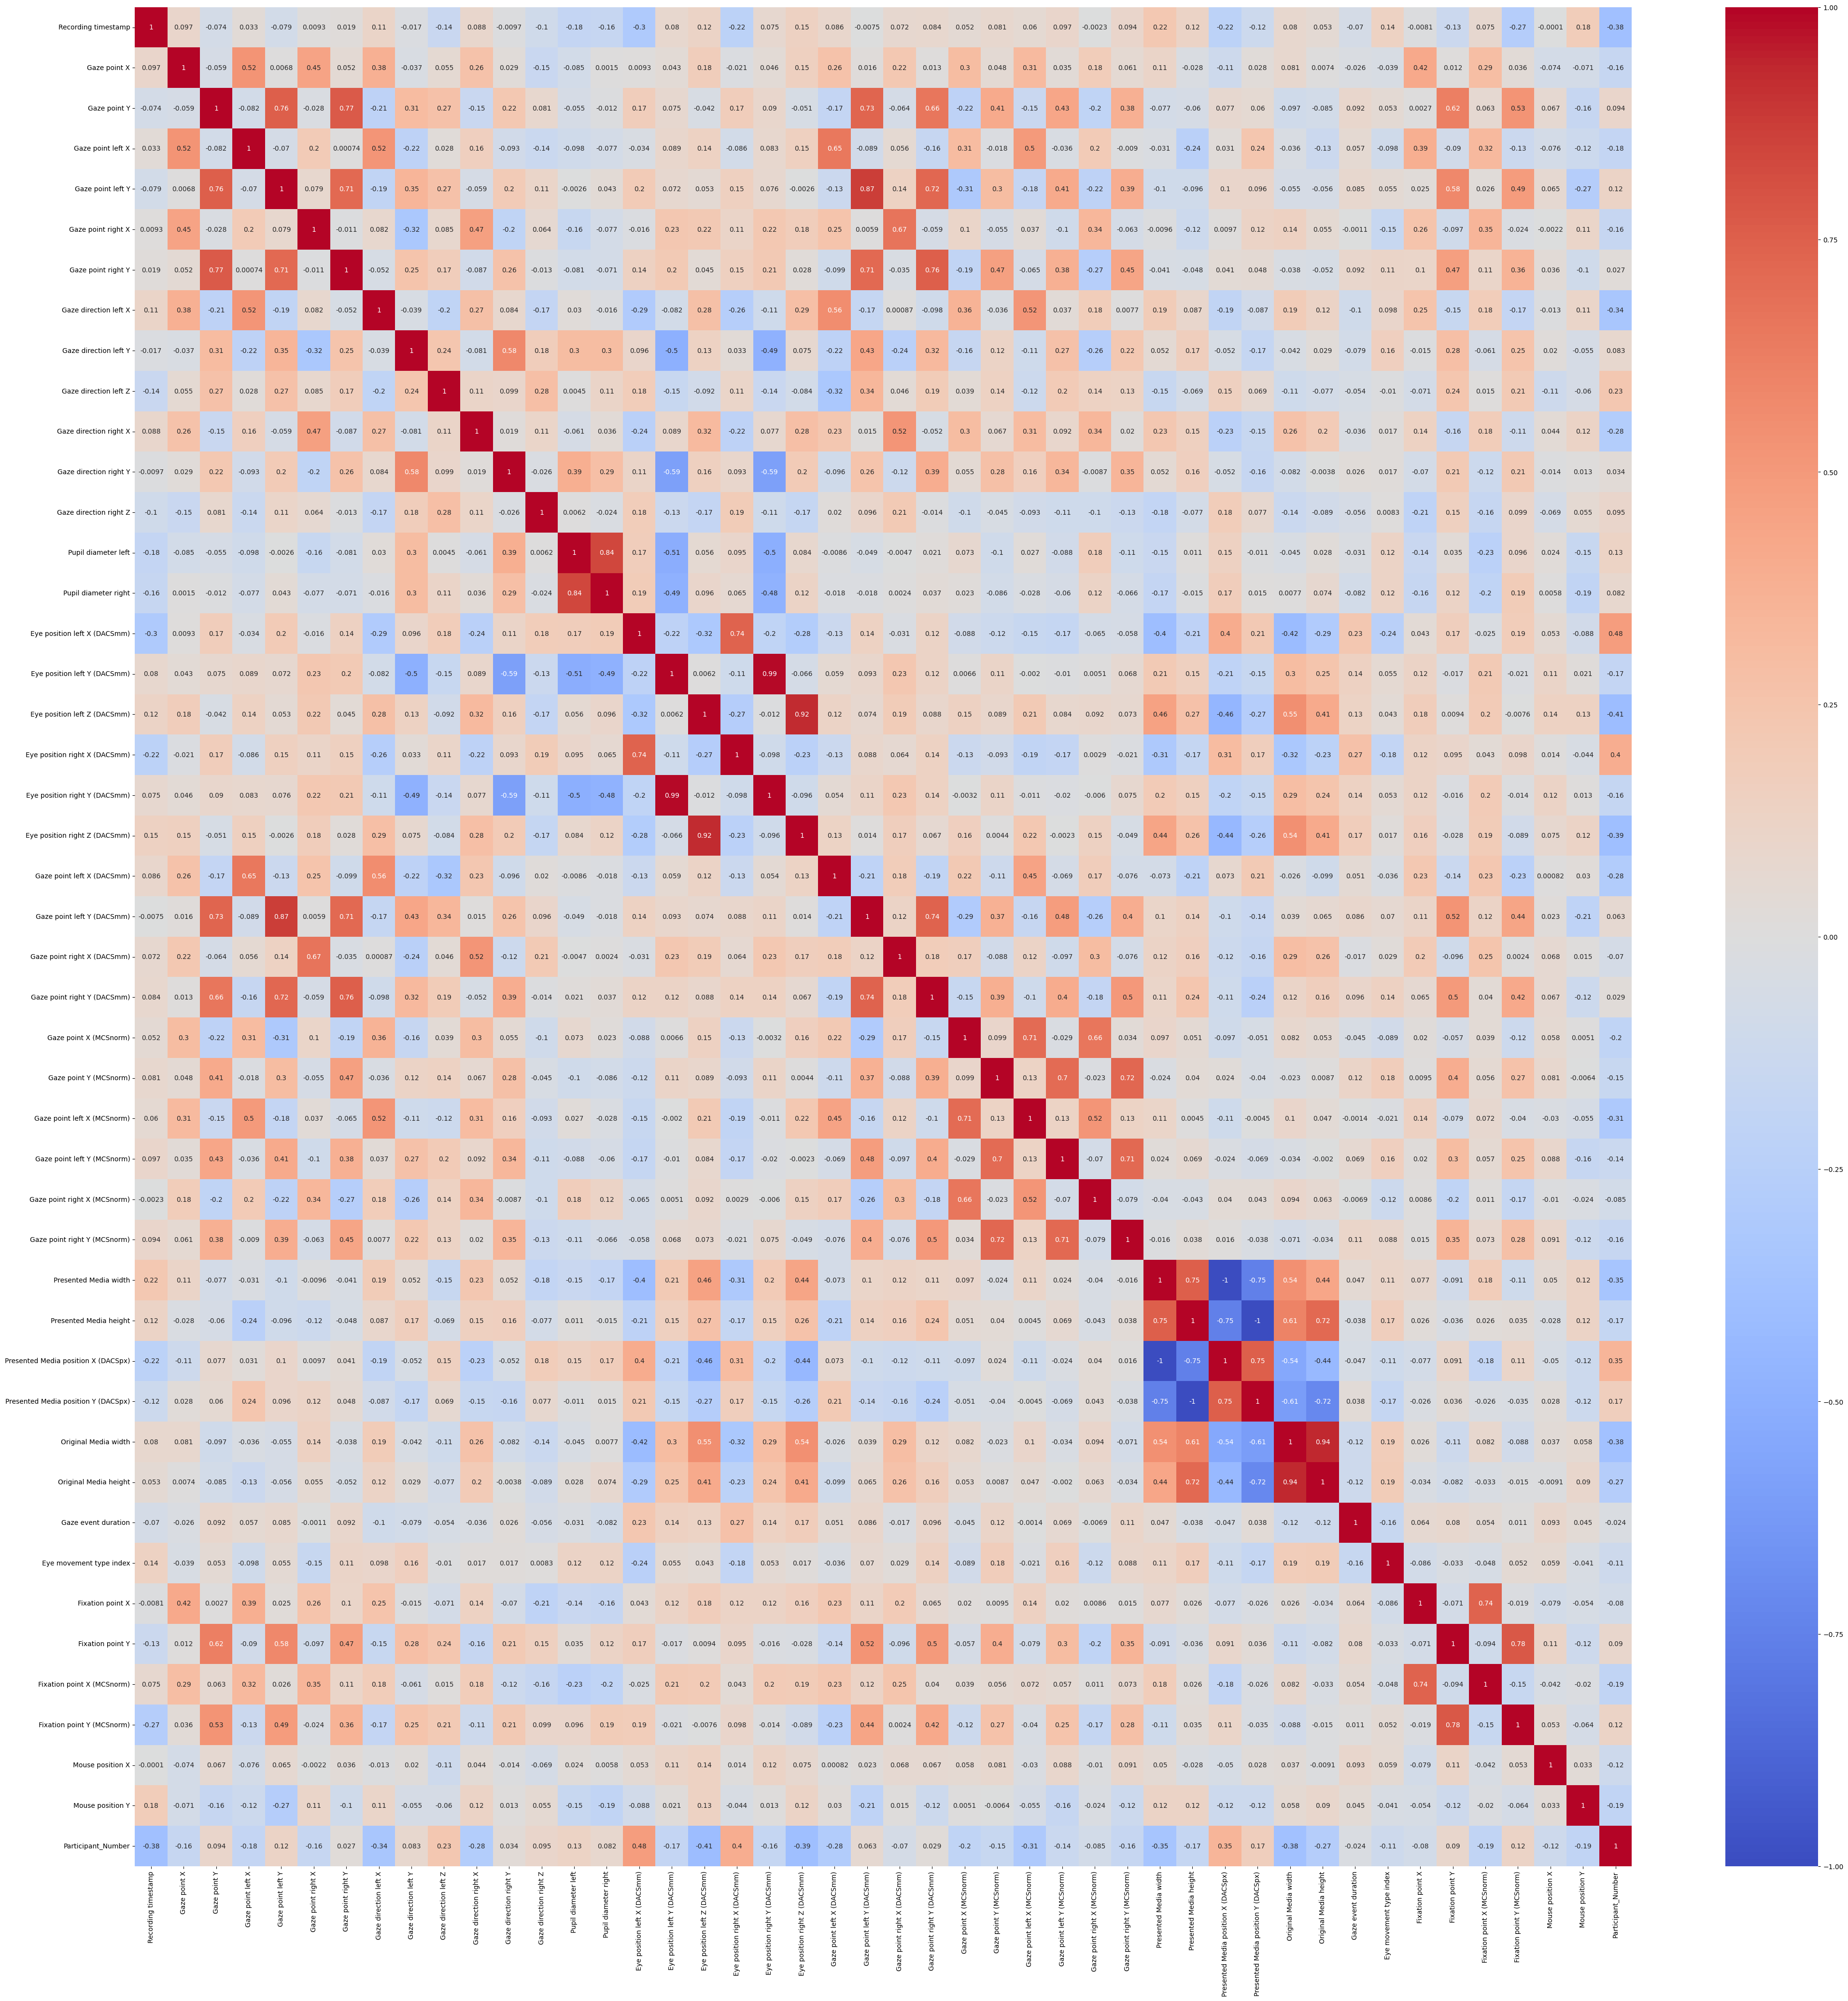

In [ ]:
#findout the correlation matrix of the columns after preprocessing the dataset 
corr_matrix = df.corr()
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()#this plot shows how our columns depend on each other and which columns will be in our feature factors

In [ ]:
# find the columns which have high correlations by setting the threshold of 0.4 
threshold = 0.4

# Find the pairs of columns with correlation above the threshold
high_corr_pairs = [(i, j) for i in range(corr_matrix.shape[1]) 
                   for j in range(i+1, corr_matrix.shape[1]) 
                   if corr_matrix.iloc[i, j] > threshold]

# Print the pairs of columns with high correlation
for pair in high_corr_pairs:
    print(f"{df.columns[pair[0]]} and {df.columns[pair[1]]} have correlation {corr_matrix.iloc[pair]}")

Gaze point X and Gaze point left X have correlation 0.5234886378170677
Gaze point X and Gaze point right X have correlation 0.44951433096184196
Gaze point X and Fixation point X have correlation 0.4193669150768792
Gaze point Y and Gaze point left Y have correlation 0.7555623121113961
Gaze point Y and Gaze point right Y have correlation 0.7677733355617858
Gaze point Y and Gaze point left Y (DACSmm) have correlation 0.7290224694231834
Gaze point Y and Gaze point right Y (DACSmm) have correlation 0.6591452019905163
Gaze point Y and Gaze point Y (MCSnorm) have correlation 0.4092724008656006
Gaze point Y and Gaze point left Y (MCSnorm) have correlation 0.4332121149460615
Gaze point Y and Fixation point Y have correlation 0.6187100537435908
Gaze point Y and Fixation point Y (MCSnorm) have correlation 0.527535760998701
Gaze point left X and Gaze direction left X have correlation 0.5211438137469029
Gaze point left X and Gaze point left X (DACSmm) have correlation 0.6493746864556219
Gaze point 

['Recording timestamp', 'Gaze point X', 'Gaze point Y', 'Gaze point left X', 'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y', 'Gaze direction left X', 'Gaze direction left Y', 'Gaze direction left Z', 'Gaze direction right X', 'Gaze direction right Y', 'Gaze direction right Z', 'Pupil diameter left', 'Pupil diameter right', 'Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)', 'Eye position right X (DACSmm)', 'Eye position right Y (DACSmm)', 'Eye position right Z (DACSmm)', 'Gaze point left X (DACSmm)', 'Gaze point left Y (DACSmm)', 'Gaze point right X (DACSmm)', 'Gaze point right Y (DACSmm)', 'Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)', 'Gaze point left X (MCSnorm)', 'Gaze point left Y (MCSnorm)', 'Gaze point right X (MCSnorm)', 'Gaze point right Y (MCSnorm)', 'Presented Media width', 'Presented Media height', 'Presented Media position X (DACSpx)', 'Presented Media position Y (DACSpx)', 'Original Media width', 'Original 

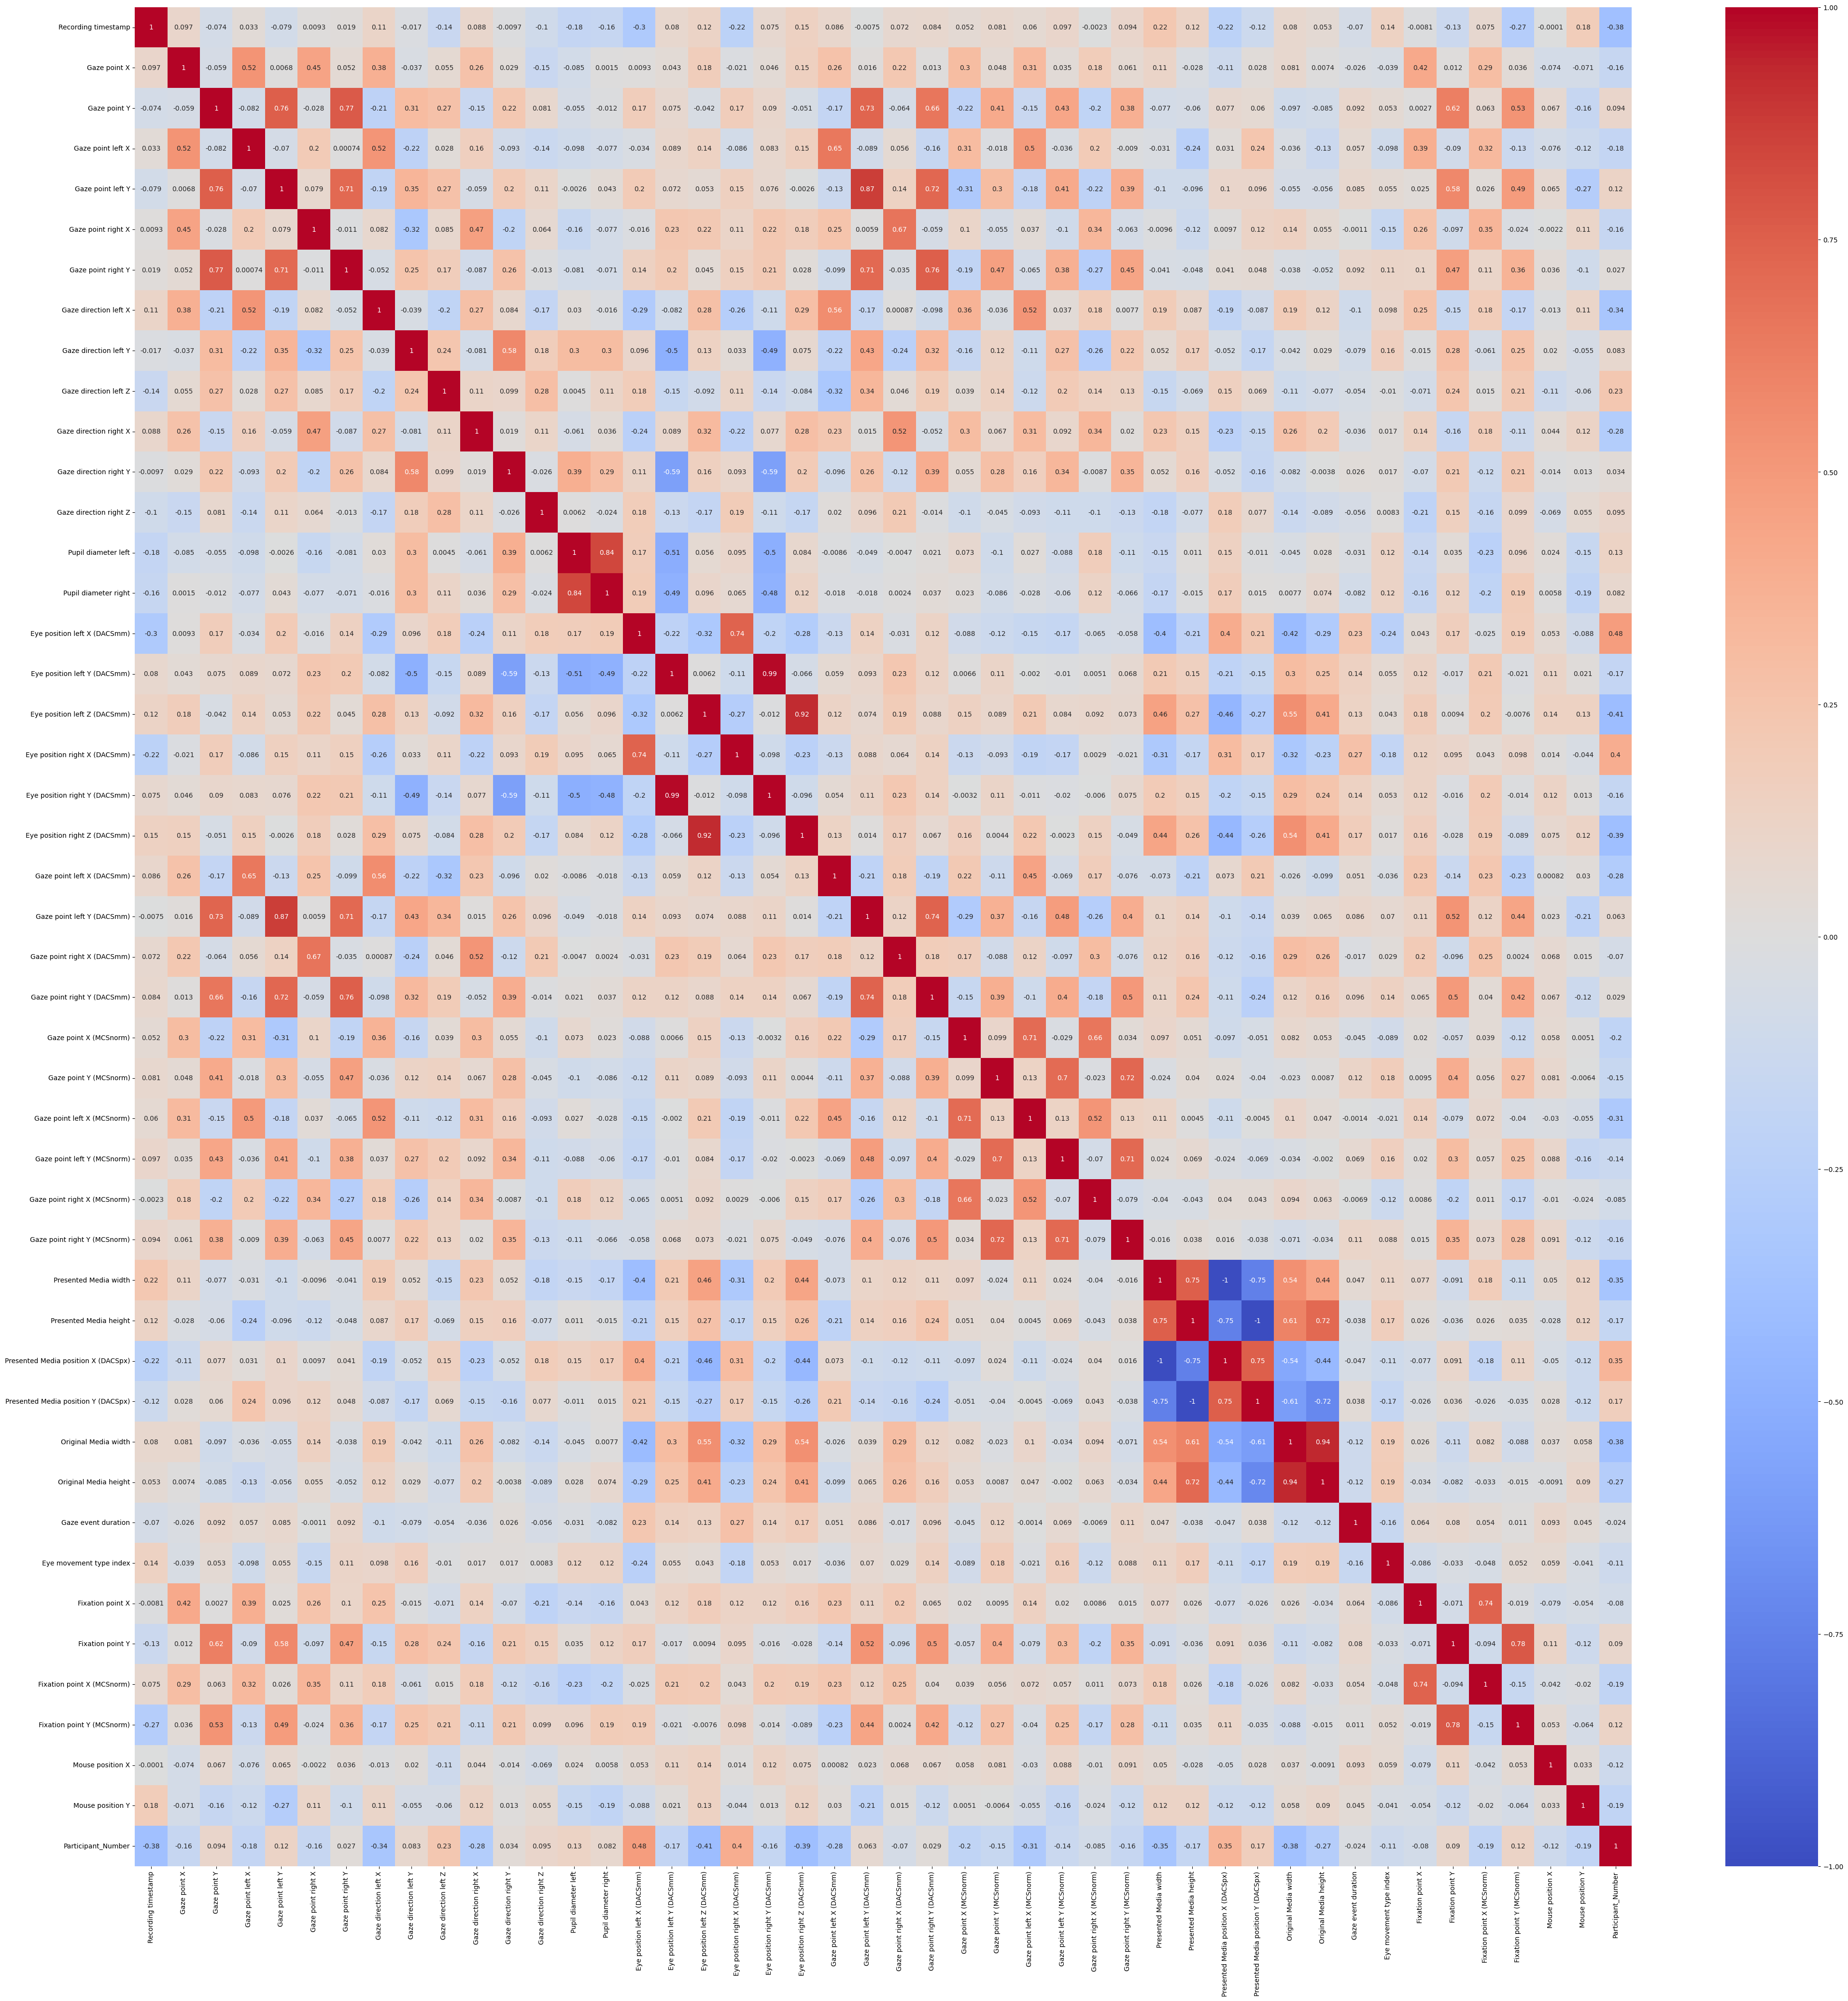

In [ ]:
# Identify numeric columns for finding the p values of the numeric to know which columns which is mostly effective
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print(numeric_cols)

# finding the correlation matrix for numeric columns and show the heat map  of columns.
corrs_matrix = df[numeric_cols].corr()
plt.figure(figsize=(50, 50))
sns.heatmap(corrs_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#By checking the correlation matrix, these columns have low correlation on result so we are dropping it
irrelevant_columns = ['Presented Media width',
'Presented Media height'
,'Presented Media position X (DACSpx)'
,'Presented Media position Y (DACSpx)','Original Media width',
'Original Media height',
'Mouse position X' , 'Mouse position Y'
]
df = df.drop(columns=irrelevant_columns)

In [ ]:
#Print the columns name of the df dataset
df.columns

Index(['Recording timestamp', 'Gaze point X', 'Gaze point Y',
       'Gaze point left X', 'Gaze point left Y', 'Gaze point right X',
       'Gaze point right Y', 'Gaze direction left X', 'Gaze direction left Y',
       'Gaze direction left Z', 'Gaze direction right X',
       'Gaze direction right Y', 'Gaze direction right Z',
       'Pupil diameter left', 'Pupil diameter right',
       'Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)',
       'Eye position left Z (DACSmm)', 'Eye position right X (DACSmm)',
       'Eye position right Y (DACSmm)', 'Eye position right Z (DACSmm)',
       'Gaze point left X (DACSmm)', 'Gaze point left Y (DACSmm)',
       'Gaze point right X (DACSmm)', 'Gaze point right Y (DACSmm)',
       'Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)',
       'Gaze point left X (MCSnorm)', 'Gaze point left Y (MCSnorm)',
       'Gaze point right X (MCSnorm)', 'Gaze point right Y (MCSnorm)',
       'Gaze event duration', 'Eye movement type index', 'Fixation

# Reading and Load Output Dataset

In [ ]:
# Read CSV file of questionaire that contain our target label with Windows-1252 encoding
Final = pd.read_csv('Questionnaire_datasetIB.csv', encoding='cp1252')
# As the name of the columns are depend on the question, we rename the column for easy use.
new_cols = {'I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate': 'consent',
    'I want to participate.': 'participate',
    'I sometimes find it difficult to see things from the ‘other guy’s’ point of view.': 'perspective_difficulty',
    'I am usually objective when I watch a film or play, and I don’t often get completely caught up in it.': 'objectivity',
    'I try to look at everybody’s side of a disagreement before I make a decision.': 'empathy_decision',
    'I sometimes try to understand my friends better by imagining how things look from their perspective.': 'perspective_taking',
    'When I am upset at someone, I usually try to ‘put myself in his shoes for a while.': 'empathy_upset',
    'Before criticising somebody, I try to imagine how I would feel if I was in their place.': 'perspective_imagination',
    'I often get emotionally involved with my friends’ problems.': 'empathy_friends',
    'I am inclined to get nervous when others around me seem to be nervous.': 'emotional_contagion_nervous',
    'People I am with have a strong influence on my mood.': 'emotional_contagion_influence',
    'It affects me very much when one of my friends seems upset.': 'empathy_friends_upset',
    'I often get deeply involved with the feelings of a character in a film, play or novel.': 'empathy_fictional_characters',
    'I get very upset when I see someone cry.': 'empathy_crying',
    'I am happy when I am with a cheerful group and sad when the others are glum.': 'emotional_contagion_cheerful_sad',
    'It worries me when others are worrying and panicky.': 'emotional_contagion_worrying_panicky',
    'I can easily tell if someone else wants to enter a conversation.': 'social_skills_conversation_entry',
    'I can pick up quickly if someone says one thing but means another.': 'social_skills_sarcasm_detection',
    'It is hard for me to see why some things upset people so much.': 'perspective_difficulty_upset',
    'I find it easy to put myself in somebody else\'s shoes.': 'perspective_taking_easy',
    'I am good at predicting how someone will feel.': 'empathy_prediction',
    'I am quick to spot when someone in a group is feeling awkward or uncomfortable.': 'social_skills_awkward_detection',
    'Other people tell me I am good at understanding how they are feeling and what they are thinking.': 'empathy_understanding_feedback',
    'I can easily tell if someone else is interested or bored with what I am saying.': 'social_skills_interest_detection',
    'Friends talk to me about their problems as they say that I am very understanding.': 'empathy_friends_problems',
    'I can sense if I am intruding, even if the other person does not tell me.': 'social_skills_intruding_detection',
    'I can easily work out what another person might want to talk about.': 'social_skills_topic_prediction',
    'I can tell if someone is masking their true emotion.': 'social_skills_emotion_detection',
    'I am good at predicting what someone will do.': 'perspective_prediction',
     'I can usually appreciate the other persons viewpoint, even if I do not agree with it.': 'Empathy_agreement',
               'I usually stay emotionally detached when watching a film.': 'objectivity_film',
               'I always try to consider the other fellows feelings before I do something.': 'empathy_consideration',
               'Before I do something I try to consider how my friends will react to it.': 'perspective_friends_reaction',
               'I feel frustrated when I cannot communicate my ideas.': 'communication_frustration',
               'I complete the sentences of other people when they find it difficult to communicate their ideas to help them.': 'communication_completion',
               'If someone is suffering from stutter, I prefer speaking rather than texting.': 'communication_stutter_preference',
               'I try to be patient when people speak with me very slowly.': 'communication_patience',
               'In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.': 'adaptation_handicapped_classroom',
               'In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.': 'adaptation_handicapped_individual',
               'I find it easy to put myself in somebody elses shoes.': 'perspective_easy_shoes',
            'I feel impatient when people communicate slowly, so I complete other people’s sentences to make the communication more efficient.': 'impatient_completion',
    'I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.': 'handicapped_pace_belief',
    'I feel left out (or excluded) when I cannot participate in a conversation.': 'feeling_left_out' }
            

# Rename the columns using the dictionary in the dataframe
Final.rename(columns=new_cols, inplace=True)

# Print the new column names to confirm the changes in the dataframe
print(Final.columns)



Index(['Participant nr', 'NR', 'Created', 'Modified', 'consent', 'participate',
       'perspective_difficulty', 'objectivity', 'empathy_decision',
       'perspective_taking', 'empathy_upset', 'perspective_imagination',
       'empathy_friends', 'emotional_contagion_nervous',
       'emotional_contagion_influence', 'empathy_friends_upset',
       'empathy_fictional_characters', 'empathy_crying',
       'emotional_contagion_cheerful_sad',
       'emotional_contagion_worrying_panicky',
       'social_skills_conversation_entry', 'social_skills_sarcasm_detection',
       'perspective_difficulty_upset', 'perspective_easy_shoes',
       'empathy_prediction', 'social_skills_awkward_detection',
       'empathy_understanding_feedback', 'social_skills_interest_detection',
       'empathy_friends_problems', 'social_skills_intruding_detection',
       'social_skills_topic_prediction', 'social_skills_emotion_detection',
       'perspective_prediction', 'Empathy_agreement', 'objectivity_film',
    

In [ ]:
#Print the information of Final Dataframe 
print(Final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 49 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Participant nr                        60 non-null     int64 
 1   NR                                    60 non-null     int64 
 2   Created                               60 non-null     object
 3   Modified                              60 non-null     object
 4   consent                               60 non-null     object
 5   participate                           60 non-null     object
 6   perspective_difficulty                60 non-null     int64 
 7   objectivity                           60 non-null     int64 
 8   empathy_decision                      60 non-null     int64 
 9   perspective_taking                    60 non-null     int64 
 10  empathy_upset                         60 non-null     int64 
 11  perspective_imagination           

In [ ]:
#By checking the correlation matrix, these columns have no effect on the on target label.
irrelevant_columns1 = ['Created', 'Modified', 'consent', 'participate',
       'perspective_difficulty', 'objectivity', 'empathy_decision',
       'perspective_taking', 'empathy_upset', 'perspective_imagination',
       'empathy_friends', 'emotional_contagion_nervous',
       'emotional_contagion_influence', 'empathy_friends_upset',
       'empathy_fictional_characters', 'empathy_crying',
       'emotional_contagion_cheerful_sad',
       'emotional_contagion_worrying_panicky',
       'social_skills_conversation_entry', 'social_skills_sarcasm_detection',
       'perspective_difficulty_upset', 'perspective_easy_shoes',
       'empathy_prediction', 'social_skills_awkward_detection',
       'empathy_understanding_feedback', 'social_skills_interest_detection',
       'empathy_friends_problems', 'social_skills_intruding_detection',
       'social_skills_topic_prediction', 'social_skills_emotion_detection',
       'perspective_prediction', 'Empathy_agreement', 'objectivity_film',
       'empathy_consideration', 'perspective_friends_reaction',
       'communication_frustration', 'communication_completion',
       'communication_stutter_preference', 'communication_patience',
       'adaptation_handicapped_classroom', 'adaptation_handicapped_individual',
       'impatient_completion', 'handicapped_pace_belief', 'feeling_left_out', 'Elapsed time']
Final = Final.drop(columns=irrelevant_columns1)

In [ ]:
#Print the total number of sum of null values in each columns of Final Dataset
null_counts = Final.isnull().sum()
print(null_counts)

Participant nr          0
NR                      0
Total Score extended    0
Total Score original    0
dtype: int64


In [ ]:
#finding the correlation matrix between the columns of the data frame 
correlations = Final.corr()
# in the code section, I find out the pair of columns of data frame which have correlation greater then 0.5  in the final data frame.
corr_pairs = []
for i in range(len(correlations.columns)):
    for j in range(i):
        if abs(correlations.iloc[i, j]) > 0.5:
            corr_pairs.append((correlations.columns[i], correlations.columns[j]))
print(corr_pairs)



[('NR', 'Participant nr'), ('Total Score original', 'Total Score extended')]


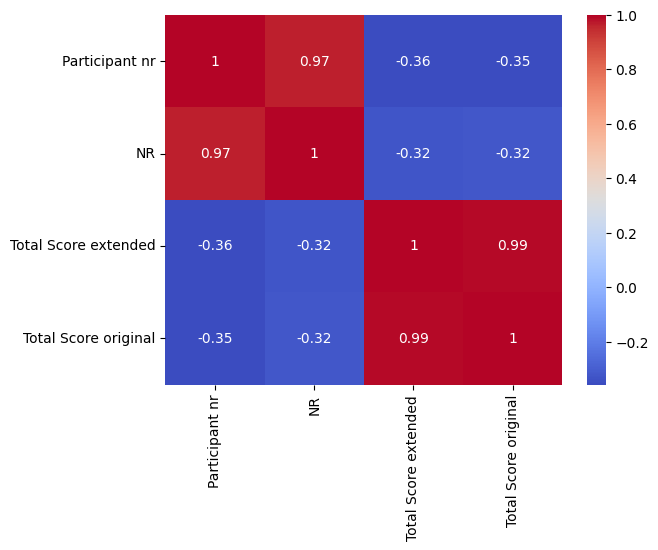

In [ ]:
# Calculate the correlation matrix of the final dataset
corr_matrix1 = Final.corr()
# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm')
plt.show()

# Extracted Input Feature of Dataset

By analysis of correalation matrix between the columns After preprocessing that dataset to find out the features factor, I found those are the following columns that are feature factor for analysis of data. Now I can work all the csv files of the dataset.


1.	Gaze point X
2.	Gaze point Y
3.	Gaze point left X
4.	Gaze point left Y
5.	Gaze point right X
6.	Gaze point right Y
7.	Gaze direction left X
8.	Gaze direction left Y
9.	Gaze direction left Z
10.	Gaze direction right X
11.	Gaze direction right Y
12.	Gaze direction right Z
13.	Pupil diameter left
14.	Pupil diameter right
15.	Eye position left X (DACSmm)
16.	Eye position left Y (DACSmm)
17.	Eye position left Z (DACSmm)
18.	Eye position right X (DACSmm)
19.	Eye position right Y (DACSmm)
20.	Eye position right Z (DACSmm)
21.	Gaze point left X (DACSmm)
22.	Gaze point left Y (DACSmm)
23.	Gaze point right X (DACSmm)
24.	Gaze point right Y (DACSmm)
25.	Gaze point X (MCSnorm)
26.	Gaze point Y (MCSnorm)
27.	Gaze point left X (MCSnorm)
28.	Gaze point left Y (MCSnorm)
29.	Gaze point right X (MCSnorm)
30.	Gaze point right Y (MCSnorm)
36.	Gaze event duration
37.	Eye movement type index
38.	Fixation point X
39.	Fixation point Y
40.	Fixation point X (MCSnorm)
41.	Fixation point Y (MCSnorm)






# Merging of Input and Output Feature 

In [ ]:
# merge dataframes based on input data and outpurt dataset on 'Participant_Number'
merged_df = pd.merge(df, Final, left_on='Participant_Number', right_on='Participant nr')

# drop 'Participant nr' column from the merged dataset
merged_df = merged_df.drop('Participant nr', axis=1)

# sort merged dataframe by 'Participant_Number'
merged_df = merged_df.sort_values('Participant_Number')

# reset index
merged_df = merged_df.reset_index(drop=True)

In [ ]:
# Print the infomation of the merged dataframe 
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Recording timestamp            142 non-null    float64
 1   Gaze point X                   142 non-null    float64
 2   Gaze point Y                   142 non-null    float64
 3   Gaze point left X              142 non-null    float64
 4   Gaze point left Y              142 non-null    float64
 5   Gaze point right X             142 non-null    float64
 6   Gaze point right Y             142 non-null    float64
 7   Gaze direction left X          142 non-null    float64
 8   Gaze direction left Y          142 non-null    float64
 9   Gaze direction left Z          142 non-null    float64
 10  Gaze direction right X         142 non-null    float64
 11  Gaze direction right Y         142 non-null    float64
 12  Gaze direction right Z         142 non-null    flo

In [ ]:
#Print the total number of sum of null values in each columns of Merged Dataset
null_counts = merged_df.isnull().sum()
print(null_counts)

Recording timestamp              0
Gaze point X                     0
Gaze point Y                     0
Gaze point left X                0
Gaze point left Y                0
Gaze point right X               0
Gaze point right Y               0
Gaze direction left X            0
Gaze direction left Y            0
Gaze direction left Z            0
Gaze direction right X           0
Gaze direction right Y           0
Gaze direction right Z           0
Pupil diameter left              0
Pupil diameter right             0
Eye position left X (DACSmm)     0
Eye position left Y (DACSmm)     0
Eye position left Z (DACSmm)     0
Eye position right X (DACSmm)    0
Eye position right Y (DACSmm)    0
Eye position right Z (DACSmm)    0
Gaze point left X (DACSmm)       0
Gaze point left Y (DACSmm)       0
Gaze point right X (DACSmm)      0
Gaze point right Y (DACSmm)      0
Gaze point X (MCSnorm)           0
Gaze point Y (MCSnorm)           0
Gaze point left X (MCSnorm)      0
Gaze point left Y (M

In [ ]:
# We are standardizing the data by scaled to a standard normal distribution 
scaler = StandardScaler()
merged_df = pd.DataFrame(scaler.fit_transform(merged_df), columns=merged_df.columns)

In [ ]:
merged_df.columns

Index(['Recording timestamp', 'Gaze point X', 'Gaze point Y',
       'Gaze point left X', 'Gaze point left Y', 'Gaze point right X',
       'Gaze point right Y', 'Gaze direction left X', 'Gaze direction left Y',
       'Gaze direction left Z', 'Gaze direction right X',
       'Gaze direction right Y', 'Gaze direction right Z',
       'Pupil diameter left', 'Pupil diameter right',
       'Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)',
       'Eye position left Z (DACSmm)', 'Eye position right X (DACSmm)',
       'Eye position right Y (DACSmm)', 'Eye position right Z (DACSmm)',
       'Gaze point left X (DACSmm)', 'Gaze point left Y (DACSmm)',
       'Gaze point right X (DACSmm)', 'Gaze point right Y (DACSmm)',
       'Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)',
       'Gaze point left X (MCSnorm)', 'Gaze point left Y (MCSnorm)',
       'Gaze point right X (MCSnorm)', 'Gaze point right Y (MCSnorm)',
       'Gaze event duration', 'Eye movement type index', 'Fixation

# Exploration of Dataset

Text(0.5, 1.0, 'Distribution of Gaze point X')

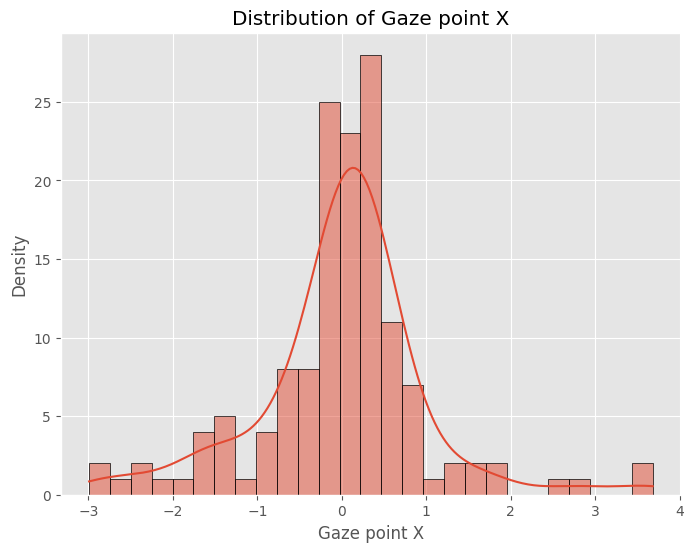

In [ ]:

# Set the figure size and style of the output
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')

# Create the histogram with a KDE curve on Gaze Point X 
sns.histplot(merged_df['Gaze point X'], kde=True, edgecolor='black')

# Add axis labels and a title in the visual
plt.xlabel('Gaze point X')
plt.ylabel('Density')
plt.title('Distribution of Gaze point X')


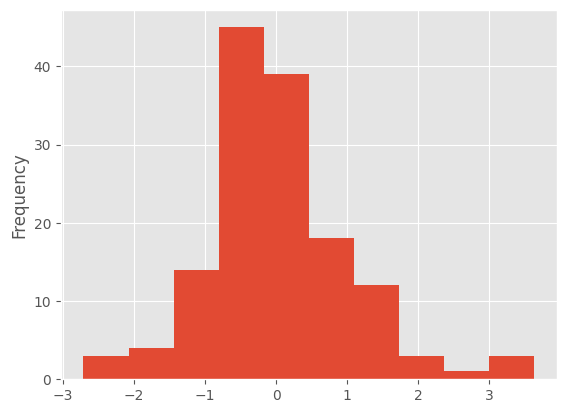

In [ ]:
# Create the histogram with Gaze Point Y
merged_df['Gaze point Y'].plot(kind='hist')
plt.show()

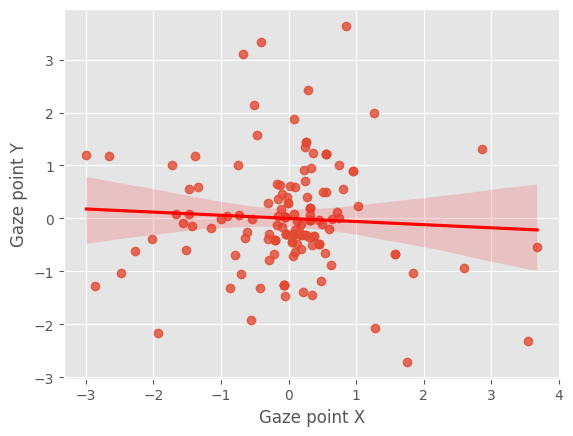

In [ ]:
# create scatter plot with trendline on the Gaze Point X and Gaze Point Y
sns.regplot(x='Gaze point X', y='Gaze point Y', data=merged_df, scatter=True, line_kws={'color': 'red'})

# show plot
plt.show()



Text(0.5, 1.0, 'Relationship between Gaze point X and Gaze point Y')

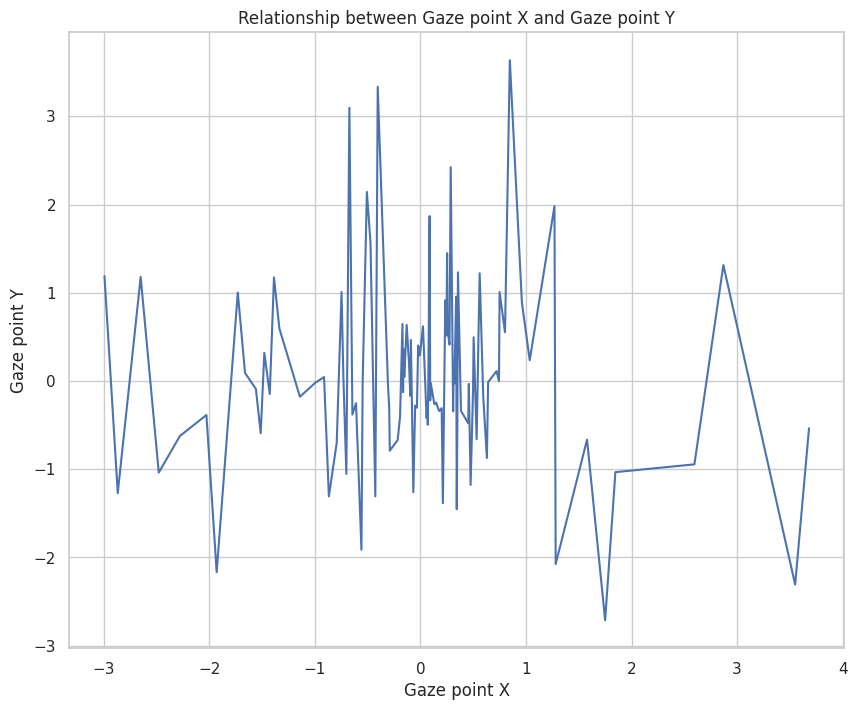

In [ ]:
# Set the figure size and style Of the output
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('whitegrid')

# Create the scatter plot with smoothed lines on Gaze Point X and Gaze Point Y
sns.lineplot(x='Gaze point X', y='Gaze point Y', data=merged_df, errorbar=None)

# Add axis labels and a title in the output
plt.xlabel('Gaze point X')
plt.ylabel('Gaze point Y')
plt.title('Relationship between Gaze point X and Gaze point Y')

Text(0.5, 1.0, 'Distribution of Gaze point X by Eye movement type index')

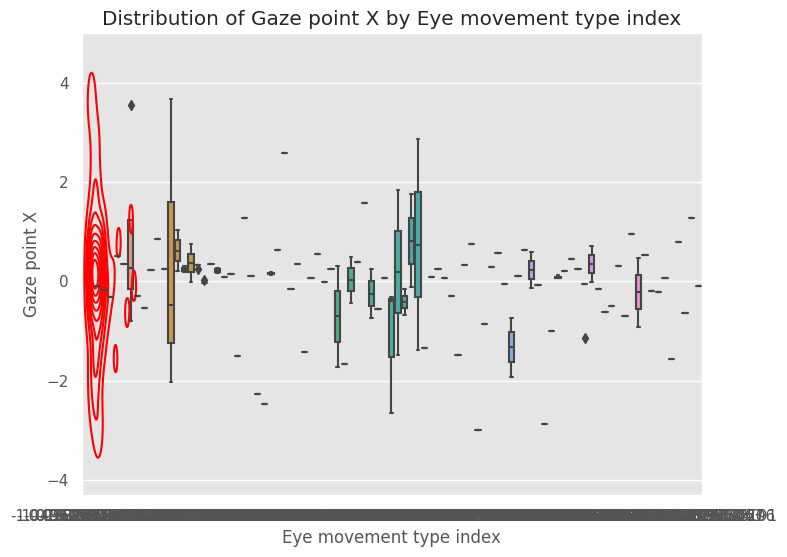

In [ ]:
# Set the figure size and style in the output
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')

# Create the box plot with a smoothed line on Eye Moment Type index and Gaze Point X
sns.boxplot(x='Eye movement type index', y='Gaze point X', data=merged_df)
sns.kdeplot(x='Eye movement type index', y='Gaze point X', data=merged_df, color='red')

# Add axis labels and a title in the output
plt.xlabel('Eye movement type index')
plt.ylabel('Gaze point X')
plt.title('Distribution of Gaze point X by Eye movement type index')


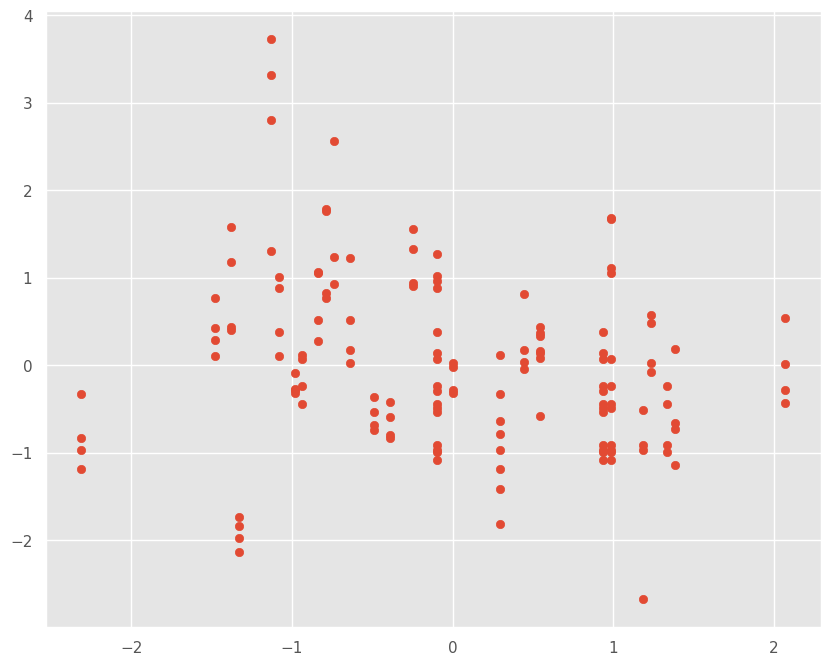

In [ ]:
# Scatter plot of 'Gaze point X' vs 'Gaze point Y'
plt.scatter(x='Total Score extended', y='Pupil diameter left', data=merged_df)
plt.show()

Text(0.5, 1.0, 'Correlation Heat Map')

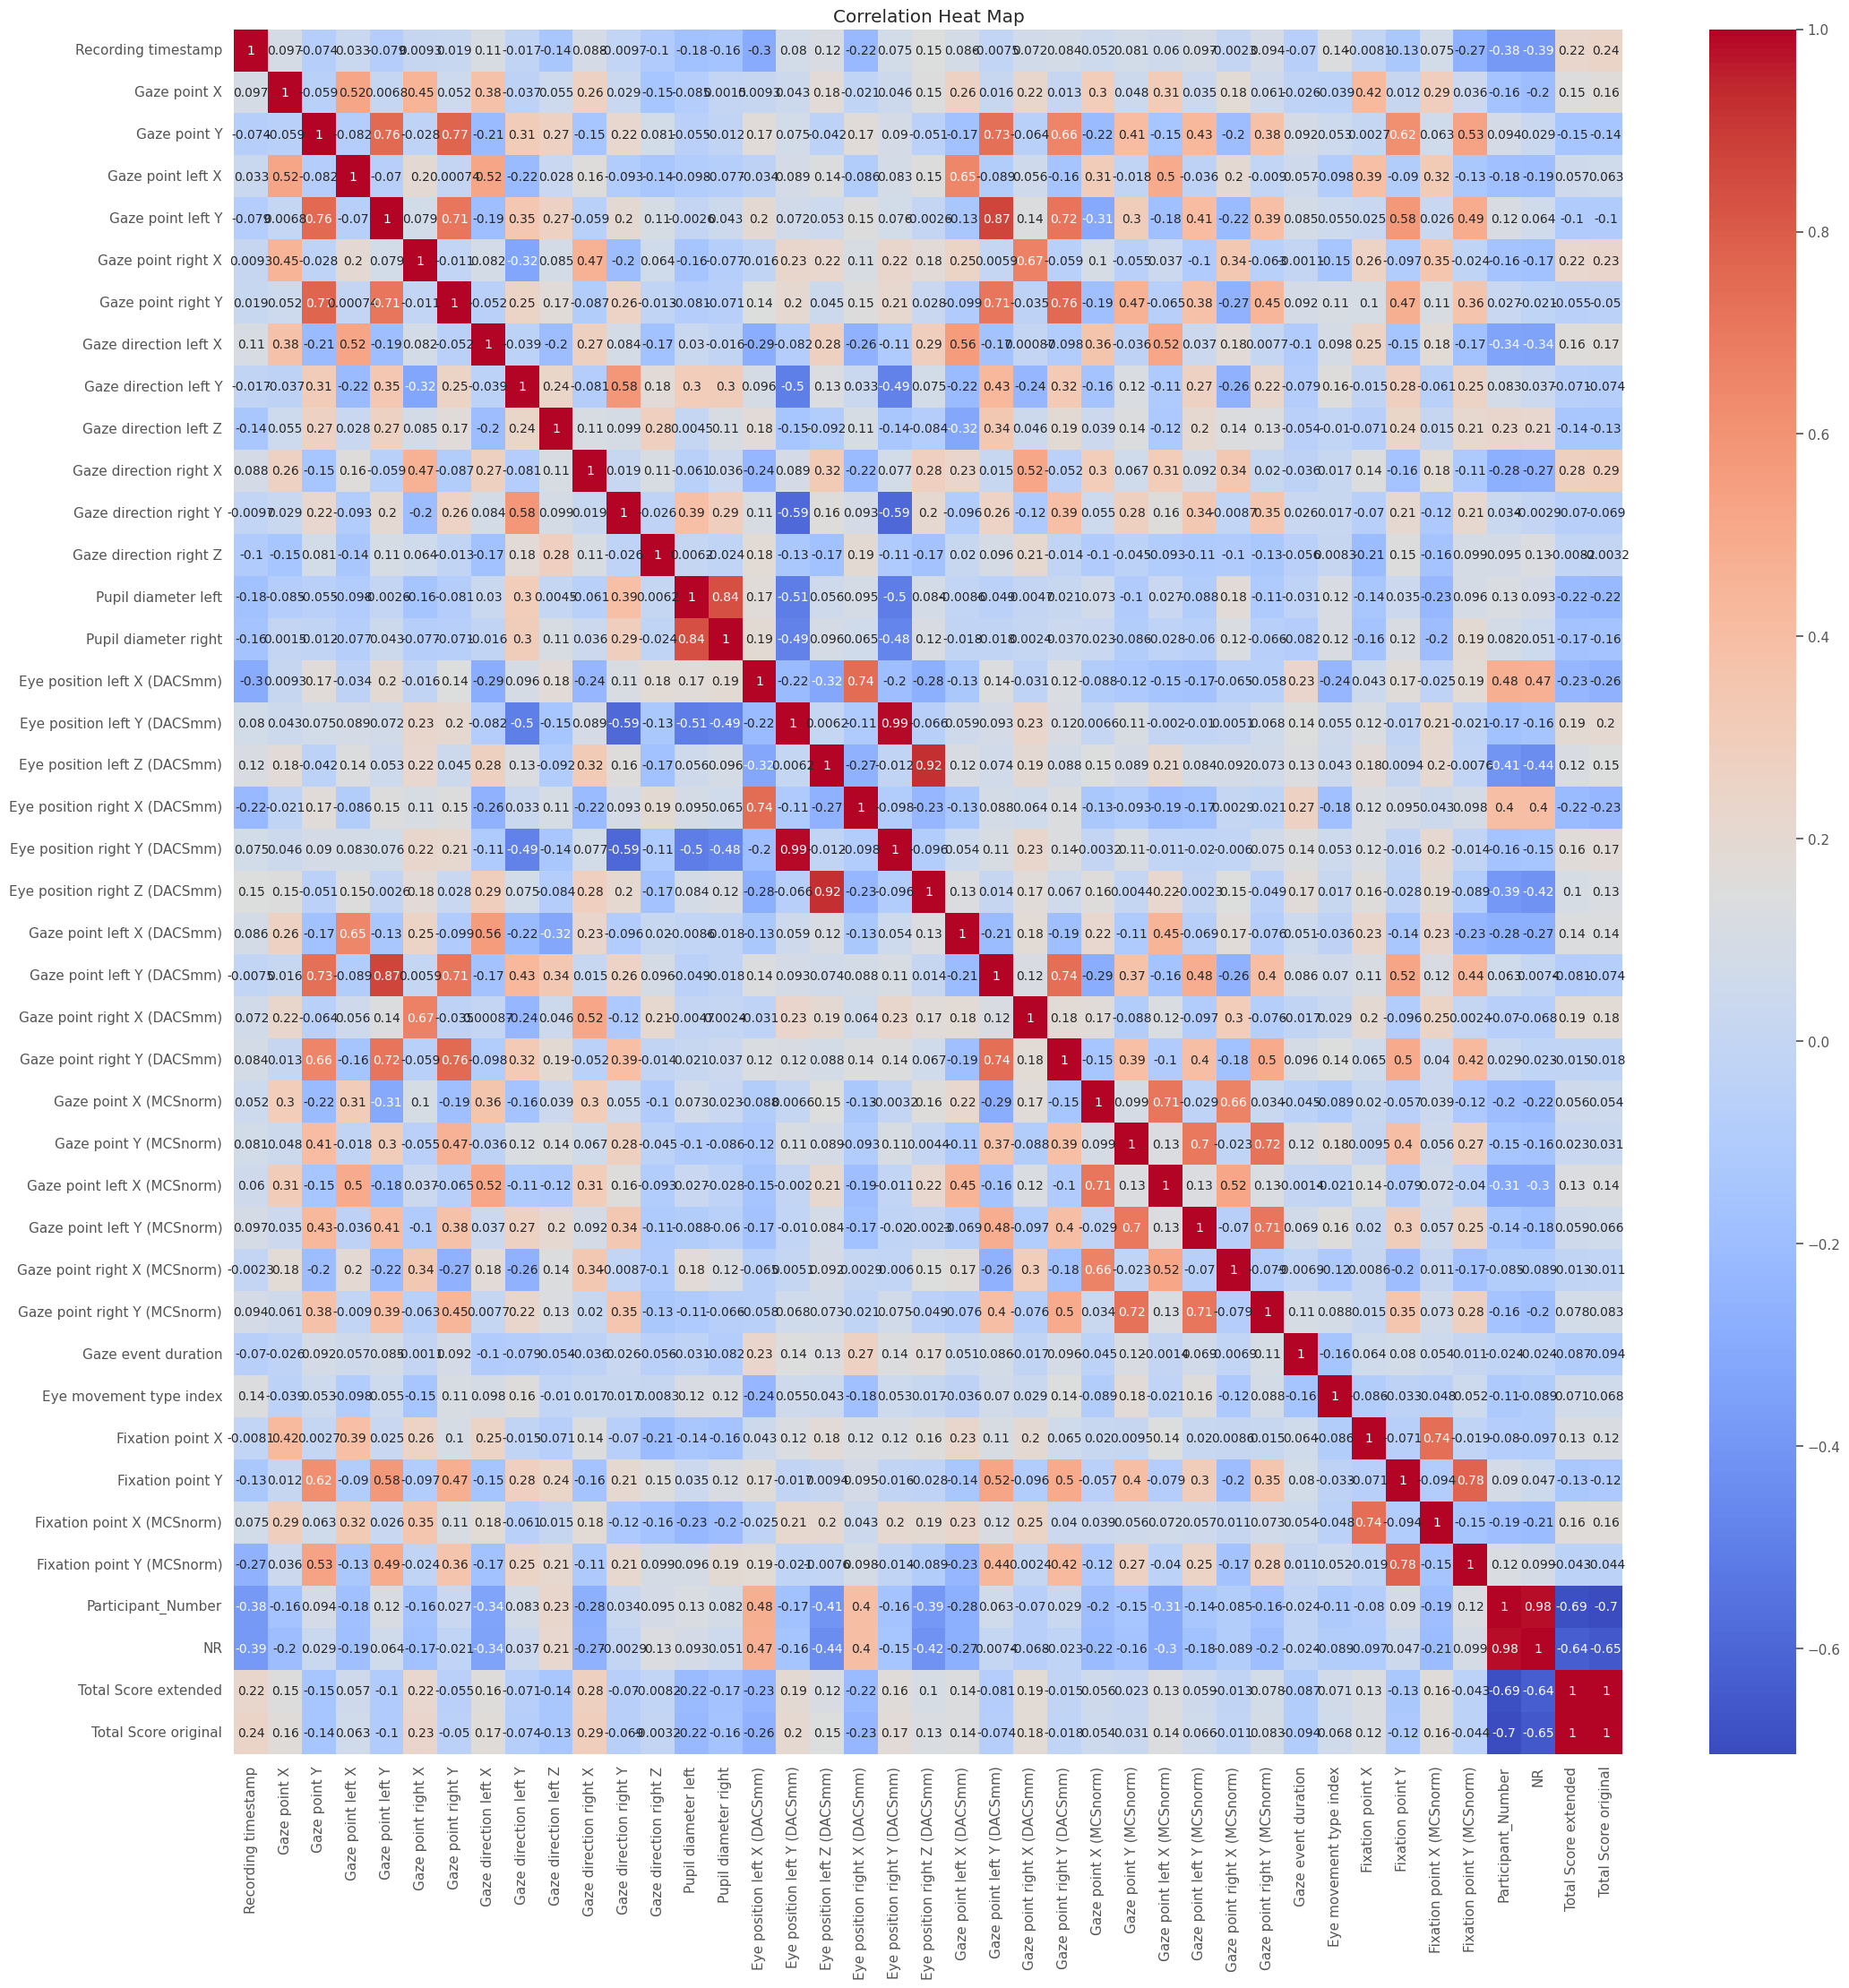

In [ ]:
# Set the figure size and style in the output
plt.figure(figsize=(25, 25))
plt.style.use('ggplot')

# Create the correlation matrix
corr = merged_df.corr()

# Create the heat map
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Add a title in the output
plt.title('Correlation Heat Map')


# Deployment of Machine Learning Model on following:
1.   Control Group
2.   Testing Group
3.   Complete Dataset





**Random Forest Model**

In [ ]:
# Define the size of the sliding window in which the our data will be divided of input features
window_size = 5

# Convert the time series data into a 2D array of shape (n_samples, window_size * n_features) to make array form data to work on time series 
X = []
y = []
for i in range(len(merged_df) - window_size):
    X.append(merged_df.iloc[i:i+window_size][['Gaze point X', 'Gaze point Y', 'Gaze point left X',
           'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y',
           'Gaze direction left X', 'Gaze direction left Y',
           'Gaze direction left Z', 'Gaze direction right X',
           'Gaze direction right Y', 'Gaze direction right Z',
           'Pupil diameter left', 'Pupil diameter right', 
           'Eye position left X (DACSmm)',
           'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)',
           'Eye position right X (DACSmm)', 'Eye position right Y (DACSmm)',
           'Eye position right Z (DACSmm)', 'Gaze point left X (DACSmm)',
           'Gaze point left Y (DACSmm)', 'Gaze point right X (DACSmm)',
           'Gaze point right Y (DACSmm)', 'Gaze point X (MCSnorm)',
           'Gaze point Y (MCSnorm)', 'Gaze point left X (MCSnorm)',
           'Gaze point left Y (MCSnorm)', 'Gaze point right X (MCSnorm)',
           'Gaze point right Y (MCSnorm)', 
             'Gaze event duration',
           'Eye movement type index', 'Fixation point X', 'Fixation point Y',
           'Fixation point X (MCSnorm)', 'Fixation point Y (MCSnorm)']].values.flatten())
    y.append(merged_df.iloc[i+window_size]['Total Score extended'])
X = np.array(X)
y = np.array(y)

# Split the data into training and test sets of 0.5 percent means 50% data on each part 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create a random forest regressor with default hyperparameters 
reg = RandomForestRegressor(random_state=42)

# Train the random forest regressor on the input label and target label
reg.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)



Mean squared error: 0.6159340575668748


**CNN Model**

In [ ]:
# Define the size of the sliding window in which the our data will be divided of input features
window_size = 5
# number of features in input data that we extracted from preprocessing 
n_features = 36  

# Convert the time series data into a 3D array of shape (n_samples, window_size, n_features) to make array form data to work on time series 
X = []
y = []
for i in range(len(merged_df) - window_size):
    X.append(merged_df.iloc[i:i+window_size][['Gaze point X', 'Gaze point Y', 'Gaze point left X',
           'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y',
           'Gaze direction left X', 'Gaze direction left Y',
           'Gaze direction left Z', 'Gaze direction right X',
           'Gaze direction right Y', 'Gaze direction right Z',
           'Pupil diameter left', 'Pupil diameter right', 
           'Eye position left X (DACSmm)',
           'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)',
           'Eye position right X (DACSmm)', 'Eye position right Y (DACSmm)',
           'Eye position right Z (DACSmm)', 'Gaze point left X (DACSmm)',
           'Gaze point left Y (DACSmm)', 'Gaze point right X (DACSmm)',
           'Gaze point right Y (DACSmm)', 'Gaze point X (MCSnorm)',
           'Gaze point Y (MCSnorm)', 'Gaze point left X (MCSnorm)',
           'Gaze point left Y (MCSnorm)', 'Gaze point right X (MCSnorm)',
           'Gaze point right Y (MCSnorm)', 
             'Gaze event duration',
           'Eye movement type index', 'Fixation point X', 'Fixation point Y',
           'Fixation point X (MCSnorm)', 'Fixation point Y (MCSnorm)']].values.reshape(window_size, n_features, 1))
    y.append(merged_df.iloc[i+window_size]['Total Score extended'])
X = np.array(X)
y = np.array(y)

# Split the data into training and test sets of 0.5 percent means 50% data on each part 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create a CNN model by applying layer on it.
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(window_size, n_features, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1, activation='linear'))

# Compile the model and optimize it the adam function
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model with epoch 50 
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)
print("Mean squared error:", mse)



Epoch 1/50
3/3 [==============================] - 1s 101ms/step - loss: 0.9994 - val_loss: 1.0105
Epoch 2/50
3/3 [==============================] - 0s 23ms/step - loss: 0.9069 - val_loss: 0.9814
Epoch 3/50
3/3 [==============================] - 0s 23ms/step - loss: 0.8536 - val_loss: 0.9664
Epoch 4/50
3/3 [==============================] - 0s 31ms/step - loss: 0.8119 - val_loss: 0.9511
Epoch 5/50
3/3 [==============================] - 0s 24ms/step - loss: 0.7662 - val_loss: 0.8964
Epoch 6/50
3/3 [==============================] - 0s 33ms/step - loss: 0.7171 - val_loss: 0.8615
Epoch 7/50
3/3 [==============================] - 0s 31ms/step - loss: 0.6865 - val_loss: 0.8443
Epoch 8/50
3/3 [==============================] - 0s 42ms/step - loss: 0.6561 - val_loss: 0.8285
Epoch 9/50
3/3 [==============================] - 0s 46ms/step - loss: 0.6274 - val_loss: 0.8179
Epoch 10/50
3/3 [==============================] - 0s 40ms/step - loss: 0.6005 - val_loss: 0.8047
Epoch 11/50
3/3 [===========

**LSTM Model**

In [ ]:
# Define the size of the sliding window in which the our data will be divided of input features
window_size = 5

# Convert the time series data into a 3D array of shape (n_samples, window_size, n_features) to make array form data to work on time series 
X = []
y = []
for i in range(len(merged_df) - window_size):
    X.append(merged_df.iloc[i:i+window_size][['Gaze point X', 'Gaze point Y', 'Gaze point left X',
           'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y',
           'Gaze direction left X', 'Gaze direction left Y',
           'Gaze direction left Z', 'Gaze direction right X',
           'Gaze direction right Y', 'Gaze direction right Z',
           'Pupil diameter left', 'Pupil diameter right', 
           'Eye position left X (DACSmm)',
           'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)',
           'Eye position right X (DACSmm)', 'Eye position right Y (DACSmm)',
           'Eye position right Z (DACSmm)', 'Gaze point left X (DACSmm)',
           'Gaze point left Y (DACSmm)', 'Gaze point right X (DACSmm)',
           'Gaze point right Y (DACSmm)', 'Gaze point X (MCSnorm)',
           'Gaze point Y (MCSnorm)', 'Gaze point left X (MCSnorm)',
           'Gaze point left Y (MCSnorm)', 'Gaze point right X (MCSnorm)',
           'Gaze point right Y (MCSnorm)', 
           'Gaze event duration',
           'Eye movement type index', 'Fixation point X', 'Fixation point Y',
           'Fixation point X (MCSnorm)', 'Fixation point Y (MCSnorm)']].values)
    y.append(merged_df.iloc[i+window_size]['Total Score extended'])
X = np.array(X)
y = np.array(y)

# Split the data into training and test sets of 0.5 percent means 50% data on each part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create an LSTM model with dense and lstm layer
model1 = Sequential()
model1.add(LSTM(units=64, input_shape=(window_size, X.shape[2])))
model1.add(Dense(units=1))

# Compile the model and optimize it
model1.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with epoch 50
model1.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test set
y_pred = model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Epoch 1/50
3/3 [==============================] - 6s 12ms/step - loss: 0.8629
Epoch 2/50
3/3 [==============================] - 0s 13ms/step - loss: 0.7554
Epoch 3/50
3/3 [==============================] - 0s 11ms/step - loss: 0.6863
Epoch 4/50
3/3 [==============================] - 0s 11ms/step - loss: 0.6261
Epoch 5/50
3/3 [==============================] - 0s 12ms/step - loss: 0.5776
Epoch 6/50
3/3 [==============================] - 0s 8ms/step - loss: 0.5345
Epoch 7/50
3/3 [==============================] - 0s 8ms/step - loss: 0.4998
Epoch 8/50
3/3 [==============================] - 0s 7ms/step - loss: 0.4649
Epoch 9/50
3/3 [==============================] - 0s 7ms/step - loss: 0.4305
Epoch 10/50
3/3 [==============================] - 0s 8ms/step - loss: 0.4000
Epoch 11/50
3/3 [==============================] - 0s 7ms/step - loss: 0.3659
Epoch 12/50
3/3 [==============================] - 0s 10ms/step - loss: 0.3382
Epoch 13/50
3/3 [==============================] - 0s 9ms/step - lo